In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from face import FACE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

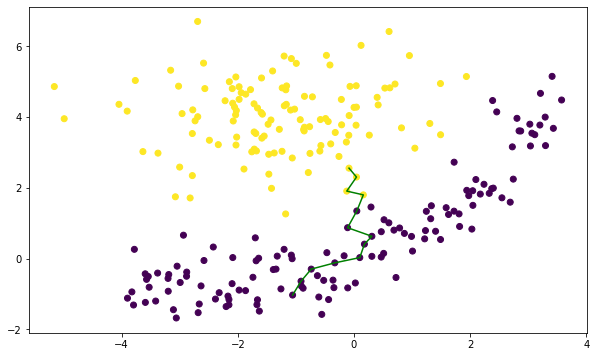

In [6]:
data = pd.DataFrame(np.load('toy_example/data.npy'), columns=['x', 'y'])
with open('toy_example/model.pkl', 'rb') as f:
    clf = pickle.load(f)

ce = FACE(data, clf, dist_threshold=0.5, density_threshold=0.001, pred_threshold=0.99)
eg = np.array([[-1, -1]])
path, prob = ce.generate_counterfactual(eg)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data['x'], data['y'], c=clf.predict(data))
ax.plot(path['x'], path['y'], 'green')

In [ ]:
adult = pd.read_csv('../Tom/adult.csv', index_col=0, nrows=1e3)
x_adult = adult[['age', 'education', 'sex', 'weekly-hours']].values
y_adult = adult[['compensation']].values.squeeze()
scaler = StandardScaler().fit(x_adult)
x_adult = scaler.transform(x_adult)
svm = SVC(probability=True)
svm.fit(x_adult, y_adult)
print(svm.score(x_adult, y_adult))

In [36]:
np.save('adult/data', x_adult)
with open('adult/model.pkl', 'wb') as file:
    pickle.dump(svm, file)
with open('adult/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [37]:
data = pd.DataFrame(np.load('adult/data.npy'), columns=['age', 'education', 'sex', 'weekly-hours'])
with open('adult/model.pkl', 'rb') as f:
    clf = pickle.load(f)
with open('adult/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

ce = FACE(data, clf, dist_threshold=0.5, density_threshold=0.005, pred_threshold=0.8)
ce.graph.number_of_nodes()

/Users/hn19405/OneDrive - University of Bristol/Year 2/counterfactuals/GraphCounterfactuals/Stefan/face.py:31: RuntimeWarning: divide by zero encountered in log
  w_ij[q] = -np.log(self.kde((self.data.values[edge_from] + self.data.values[edge_to]) / 2) * dist)


785

In [42]:
eg = data.iloc[0].values.reshape(1, -1)
path, prob = ce.generate_counterfactual(eg)
pd.DataFrame(scaler.inverse_transform(path), columns=['age', 'education', 'sex', 'weekly-hours'])

,age,education,sex,weekly-hours
0,39.0,1.0,1.0,40.0
1,39.0,1.0,1.0,45.0
2,42.0,1.0,1.0,50.0
3,45.0,1.0,1.0,55.0
